In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
V = lambda l,b,g,x: l*np.cos(x)-l+2*(sigma(l,b,g)-1)*np.log(1+np.cos(x))-2*sigma(l,b,g)*np.log(3-np.cos(x)+4*np.sin(x/2))
sigma = lambda l,b,g: b*g/np.sqrt(l)
PvvV0 = lambda l,b,g: l+1
PuuV0 = lambda l,b,g: 1-l
PuV0 = lambda l,b,g: -2*sigma(l,b,g)
PvvV1 = lambda l,b,g: l+np.sqrt(2)*sigma(l,b,g)+2
PuuV1 = lambda l,b,g: 1/np.cos(np.pi/5)**2+sigma(l,b,g)*np.tan(np.pi/5)*1/np.cos(np.pi/5)-l*np.cos(2*np.pi/5)
PuV1 = lambda l,b,g: -2*np.tan(np.pi/5)-2*sigma(l,b,g)*1/np.cos(np.pi/5)+l*np.sin(2*np.pi/5)
V0 = lambda l,b,g: -2 * np.log(2)
V1 = lambda l,b,g: V(l,b,g,-2*np.pi/5)

In [3]:
apex0 = lambda l,b,g: -PuV0(l,b,g)/PuuV0(l,b,g)
Vapex0 = lambda l,b,g: V0(l,b,g)-PuV0(l,b,g)**2/(2*PuuV0(l,b,g))
apex1 = lambda l,b,g: -PuV1(l,b,g)/PuuV1(l,b,g)-2*np.pi/5
Vapex1 = lambda l,b,g: V1(l,b,g)-PuV1(l,b,g)**2/(2*PuuV1(l,b,g))
k = lambda l,b,g: (Vapex0(l,b,g)-Vapex1(l,b,g))/(apex0(l,b,g)-apex1(l,b,g))

/var/folders/z6/fmr1p2mn2xvg89jdw6vbwb7w0000gq/T/ipykernel_96076/1147071275.py:1: RuntimeWarning: divide by zero encountered in log
  V = lambda l,b,g,x: l*np.cos(x)-l+2*(sigma(l,b,g)-1)*np.log(1+np.cos(x))-2*sigma(l,b,g)*np.log(3-np.cos(x)+4*np.sin(x/2))
/var/folders/z6/fmr1p2mn2xvg89jdw6vbwb7w0000gq/T/ipykernel_96076/1147071275.py:1: RuntimeWarning: invalid value encountered in multiply
  V = lambda l,b,g,x: l*np.cos(x)-l+2*(sigma(l,b,g)-1)*np.log(1+np.cos(x))-2*sigma(l,b,g)*np.log(3-np.cos(x)+4*np.sin(x/2))


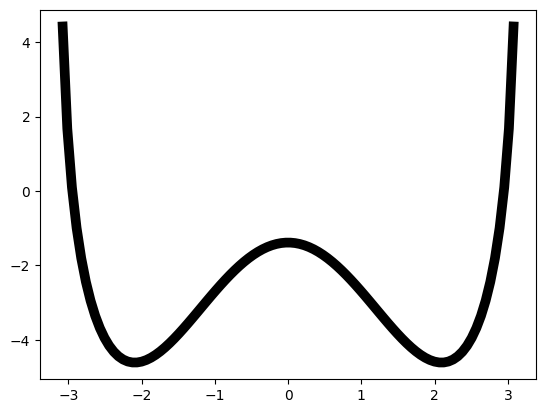

In [11]:
# test current functions
l,b,g = 4,0,0.1
V0approx = lambda x: PuuV0(l,b,g)/2*(x-apex0(l,b,g))**2 + Vapex0(l,b,g)
V1approx = lambda x: PuuV1(l,b,g)/2*(x-apex1(l,b,g))**2 + Vapex1(l,b,g)

us = np.linspace(-np.pi,np.pi,100)
#plt.plot(us,V0approx(us),label='V0approx')
#plt.plot(us,V1approx(us),label='V1approx')
plt.plot(us,V(l,b,g,us),label='V', linewidth=7, color='black')
plt.savefig("plot.svg", format="svg")
plt.show()

In [8]:
def analytic_time3(l,b,g):
    term1factor = g/k(l,b,g)*np.sqrt(PvvV0(l,b,g)/PvvV1(l,b,g))*(np.exp((Vapex0(l,b,g)-Vapex1(l,b,g))/g**2)-1)
    term1inner = np.sqrt(np.pi/(2*PuuV1(l,b,g)))+np.sqrt(-np.pi/(2*PuuV0(l,b,g)))+g/k(l,b,g)
    term2factor = np.sqrt(PvvV0(l,b,g)/PvvV1(l,b,g))
    term2inner = np.pi/(2*np.sqrt(-PuuV0(l,b,g)*PuuV1(l,b,g)))-1/k(l,b,g)*(apex0(l,b,g)-apex1(l,b,g))
    return term1factor*term1inner+term2factor*term2inner

In [9]:
import scipy

def analytic_time1(lambda_val, b_val, g_val):
    def parametrize(alpha, beta):
        u = np.arcsin(g_val * alpha / np.sqrt(lambda_val)) + np.arcsin(g_val * beta / np.sqrt(lambda_val))
        v = np.arcsin(g_val * alpha / np.sqrt(lambda_val)) - np.arcsin(g_val * beta / np.sqrt(lambda_val))
        return u, v

    def analytic_time():
        def V(u, v):
            term1 = lambda_val * (np.cos(u) - np.cos(v)) - 2 * np.log(np.cos(u) + np.cos(v))
            term2 = 2 * g_val * b_val / np.sqrt(lambda_val) * np.log(np.cos(u) + np.cos(v))
            term3 = -2 * g_val * b_val / np.sqrt(lambda_val) * np.log(
                2 + 2 * np.sin((u + v) / 2) + 2 * np.sin((u - v) / 2) + np.cos(v) - np.cos(u)
            )
            return term1 + term2 + term3

        def Vuu(alpha):
            return (lambda_val - g_val**2 * b_val * alpha) / (lambda_val - g_val**2 * alpha**2) - lambda_val + 2 * g_val**2 * alpha**2

        def Vvv(alpha):
            return (lambda_val - g_val**2 * b_val * alpha) / (lambda_val - g_val**2 * alpha**2) + lambda_val

        # Solve for roots
        coeffs = [g_val**2, 0, 1-lambda_val, -b_val]
        alpha_roots = np.sort(np.real(np.roots(coeffs)))

        # Map alpha_roots to u_roots
        u_roots = [parametrize(alpha, alpha)[0] for alpha in alpha_roots]

        # Calculate V values
        Vs = V(u_roots[1], 0)
        Va = V(u_roots[0], 0)
        Vb = V(u_roots[2], 0)

        print('actual DeltaV', Vs-Va)

        # Calculate terms
        term1 = 2 * np.pi * np.exp((Vs - Va) / g_val**2) / np.sqrt(Vuu(alpha_roots[0]) * Vvv(alpha_roots[0]))
        term2 = 2 * np.pi * np.exp((Vs - Vb) / g_val**2) / np.sqrt(Vuu(alpha_roots[2]) * Vvv(alpha_roots[2]))
        term3 = np.sqrt(Vvv(alpha_roots[1]) / (-Vuu(alpha_roots[1])))
        term4 = np.exp((Va - Vb) / g_val**2)
        term5 = np.sqrt(Vuu(alpha_roots[0]) * Vvv(alpha_roots[0]) / Vuu(alpha_roots[2]) / Vvv(alpha_roots[2]))

        return (term1 + term2) * term3 / (term4 * term5 + 1)

    return analytic_time()

In [10]:
def analytic_time4(l,b,g):
    C = 2*np.pi*np.sqrt(
        (l + 1) /
        ((l - 1) * (2 * l - 2 + g * b * np.sqrt(l - 1)) * (2 * l + g * b * np.sqrt(l - 1)))
    )
    DeltaV = -4*g*b/np.sqrt(l)*np.arcsin(np.sqrt(1-1/l))+2*(l-1)-2*np.log(l)
    print('estimated DeltaV', DeltaV)
    return np.exp(DeltaV/g**2)*C

In [19]:
l,b,g = 2,0.5,0.3

In [ ]:
print(analytic_time1(l,b,g))
print(analytic_time3(l,b,g))
print(analytic_time4(l,b,g))

actual DeltaV 0.2858487029053234
112.8856970782992
93.93624579969139
estimated DeltaV 0.28048941851823206
82.22375225530566


In [22]:
def actual_well_depth(lambda_val,b_val,g_val):
    def parametrize(alpha, beta):
        u = np.arcsin(g_val * alpha / np.sqrt(lambda_val)) + np.arcsin(g_val * beta / np.sqrt(lambda_val))
        v = np.arcsin(g_val * alpha / np.sqrt(lambda_val)) - np.arcsin(g_val * beta / np.sqrt(lambda_val))
        return u, v
    def V(u, v):
        term1 = lambda_val * (np.cos(u) - np.cos(v)) - 2 * np.log(np.cos(u) + np.cos(v))
        term2 = 2 * g_val * b_val / np.sqrt(lambda_val) * np.log(np.cos(u) + np.cos(v))
        term3 = -2 * g_val * b_val / np.sqrt(lambda_val) * np.log(
            2 + 2 * np.sin((u + v) / 2) + 2 * np.sin((u - v) / 2) + np.cos(v) - np.cos(u)
        )
        return term1 + term2 + term3
    # Solve for roots
    coeffs = [g_val**2, 0, 1-lambda_val, -b_val]
    alpha_roots = np.sort(np.real(np.roots(coeffs)))

    # Map alpha_roots to u_roots
    u_roots = [parametrize(alpha, alpha)[0] for alpha in alpha_roots]

    # Calculate V values
    Vs = V(u_roots[1], 0)
    Va = V(u_roots[0], 0)
    Vb = V(u_roots[2], 0)
    return Vs-Va

def estimated_well_depth(l,b,g):
    return -4*g*b/np.sqrt(l)*np.arcsin(np.sqrt(1-1/l))+2*(l-1)-2*np.log(l)


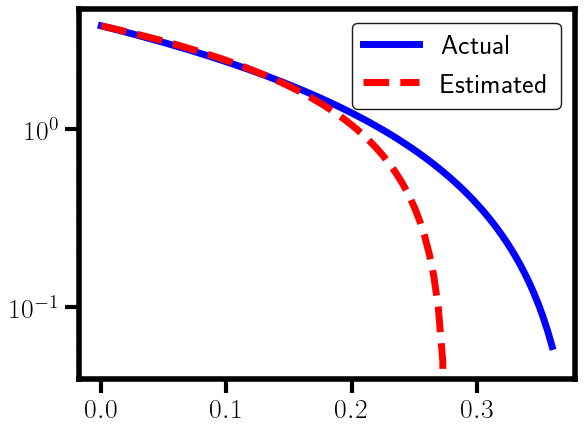

In [38]:
import matplotlib.pyplot as plt
from matplotlib import rc
rc('text', usetex=True)

plt.rcParams.update({
    'lines.linewidth': 5,       # Line thickness
    'lines.markersize': 10,     # Marker size
    'axes.linewidth': 4,        # Border thickness for axes
    'axes.titlesize': 20,       # Title font size
    'axes.labelsize': 20,       # Label font size
    'xtick.labelsize': 20,      # X-axis tick label font size
    'ytick.labelsize': 20,      # Y-axis tick label font size
    'xtick.major.size': 10,     # Length of X-axis ticks
    'xtick.major.width': 3,
    'ytick.major.size': 10,     # Length of X-axis ticks
    'ytick.major.width': 3,
    'legend.fontsize': 20,      # Legend font size
    'legend.frameon': True,     # Enable legend frame
    'legend.framealpha': 0.9,   # Legend frame transparency
    'legend.edgecolor': 'black', # Legend frame border color
})

l = 2
g = 0.4
bs = np.linspace(0.0, 0.9, 100)

actuals = [actual_well_depth(l, b, g) for b in bs]
estimateds = [estimated_well_depth(l, b, g) for b in bs]

plt.plot(bs*g, np.array(actuals)/g**2, label='Actual', color='blue')
plt.plot(bs*g, np.array(estimateds)/g**2, label='Estimated', color='red', linestyle='--')
plt.yscale('log')
plt.legend()
plt.show()


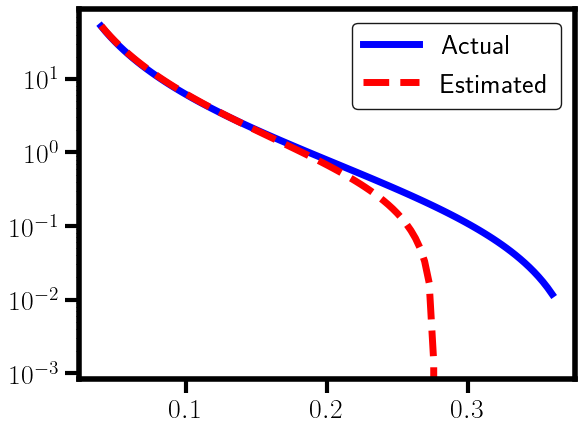

In [39]:

import matplotlib.pyplot as plt
from matplotlib import rc
rc('text', usetex=True)

plt.rcParams.update({
    'lines.linewidth': 5,       # Line thickness
    'lines.markersize': 10,     # Marker size
    'axes.linewidth': 4,        # Border thickness for axes
    'axes.titlesize': 20,       # Title font size
    'axes.labelsize': 20,       # Label font size
    'xtick.labelsize': 20,      # X-axis tick label font size
    'ytick.labelsize': 20,      # Y-axis tick label font size
    'xtick.major.size': 10,     # Length of X-axis ticks
    'xtick.major.width': 3,
    'ytick.major.size': 10,     # Length of X-axis ticks
    'ytick.major.width': 3,
    'legend.fontsize': 20,      # Legend font size
    'legend.frameon': True,     # Enable legend frame
    'legend.framealpha': 0.9,   # Legend frame transparency
    'legend.edgecolor': 'black', # Legend frame border color
})

l = 2
b = 0.4
gs = np.linspace(0.1, 0.9, 100)

actuals = [actual_well_depth(l, b, g) for g in gs]
estimateds = [estimated_well_depth(l, b, g) for g in gs]

plt.plot(gs*b, np.array(actuals)/gs**2, label='Actual', color='blue')
plt.plot(gs*b, np.array(estimateds)/gs**2, label='Estimated', color='red', linestyle='--')
plt.yscale('log')
plt.legend()
plt.show()

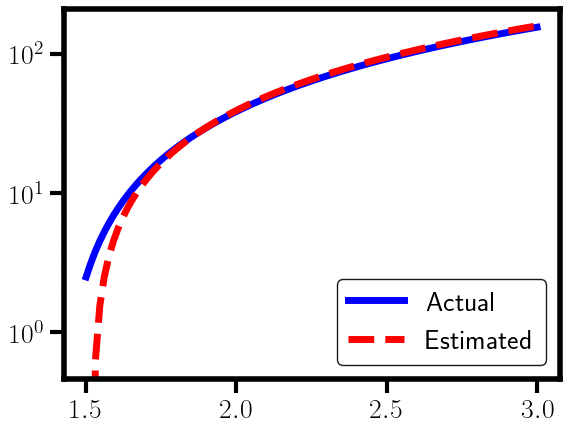

In [42]:

import matplotlib.pyplot as plt
from matplotlib import rc
rc('text', usetex=True)

plt.rcParams.update({
    'lines.linewidth': 5,       # Line thickness
    'lines.markersize': 10,     # Marker size
    'axes.linewidth': 4,        # Border thickness for axes
    'axes.titlesize': 20,       # Title font size
    'axes.labelsize': 20,       # Label font size
    'xtick.labelsize': 20,      # X-axis tick label font size
    'ytick.labelsize': 20,      # Y-axis tick label font size
    'xtick.major.size': 10,     # Length of X-axis ticks
    'xtick.major.width': 3,
    'ytick.major.size': 10,     # Length of X-axis ticks
    'ytick.major.width': 3,
    'legend.fontsize': 20,      # Legend font size
    'legend.frameon': True,     # Enable legend frame
    'legend.framealpha': 0.9,   # Legend frame transparency
    'legend.edgecolor': 'black', # Legend frame border color
})

ls = np.linspace(1.5, 3, 100)
b = 1
g = 0.1

actuals = [actual_well_depth(l, b, g) for l in ls]
estimateds = [estimated_well_depth(l, b, g) for l in ls]

plt.plot(ls, np.array(actuals)/g**2, label='Actual', color='blue')
plt.plot(ls, np.array(estimateds)/g**2, label='Estimated', color='red', linestyle='--')
plt.yscale('log')
plt.legend()
plt.show()

6.876739657027108e+27 -2.6863741062436843
7.171164577962127e+26 -2.69513864419652
7.81138154901773e+25 -2.704986002434013
8.88367590968565e+24 -2.7159906450082385
1.0543521715017934e+24 -2.7282349771207914
1.3053111629696763e+23 -2.7418103795265023
1.6849646368299107e+22 -2.756818409479154
2.2669124328641357e+21 -2.7733722002461514
3.177390627504196e+20 -2.7915980984534094
4.637981683506711e+19 -2.811637587648028
7.047688518482919e+18 -2.833649558049078
1.1144652744007972e+18 -2.8578129972545914
1.833318303276121e+17 -2.884330195707968
3.1362935167965732e+16 -2.9134305853918634
5577839467113520.0 -2.945375362425453
1030994136225679.0 -2.980463086644468
198000159376297.1 -3.0190365075589836
39498522299468.586 -3.061490941576116
8182729755087.657 -3.108284627582256
1760045690153.8818 -3.15995162783809
392984831996.94025 -3.217118034716726
91071895744.25208 -3.2805225150581063
21902570229.576008 -3.3510426090587644
5466009225.045298 -3.4297287554117504
1415444154.170941 -3.517848826159432

/var/folders/z6/fmr1p2mn2xvg89jdw6vbwb7w0000gq/T/ipykernel_21207/3793240397.py:39: RuntimeWarning: invalid value encountered in sqrt
  term3 = np.sqrt(Vvv(alpha_roots[1]) / (-Vuu(alpha_roots[1])))


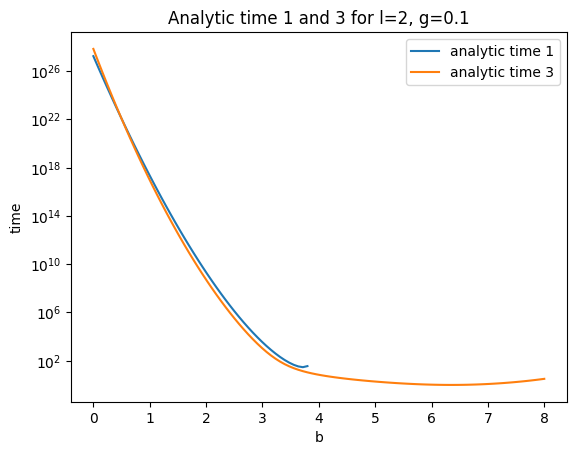

In [88]:
g = 0.1
l = 2
bs = np.linspace(0, 8, 100)

t1s = [analytic_time1(l, b, g) for b in bs]
t3s = [analytic_time3(l, b, g) for b in bs]

bs1 = [b for i,b in enumerate(bs) if not np.isnan(t1s[i])]
t1s = [t for t in t1s if not np.isnan(t)]

bs3 = [b for i,b in enumerate(bs) if not np.isnan(t3s[i])]
t3s = [t for t in t3s if not np.isnan(t)]


plt.plot(bs1, t1s, label='analytic time 1')
plt.plot(bs3, t3s, label='analytic time 3')
#plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.xlabel('b')
plt.ylabel('time')
plt.title(f'Analytic time 1 and 3 for l={l}, g={g}')
plt.show()

9.412270149709162e+16 -2.8949268412496214
5382530141327765.0 -2.905899621242468
402149338953896.94 -2.9172623916968106
38073720931994.67 -2.9290297145154125
4448797372382.13 -2.9412169023747547
627058924342.3634 -2.9538400670709217
104515977229.11978 -2.96691617164605
20245214585.182102 -2.980463086644468
4488688570.382549 -2.9944996508849338
1124001327.3511596 -3.0090457371774457
314156193.6006303 -3.024122323459983
96990861.20371166 -3.0397515698835575
32772625.053877536 -3.055956902433717
12020483.993046587 -3.0727631037439975
4751019.1697971355 -3.090196411832855
2010338.0212598462 -3.108284627582256
905377.5744219457 -3.1270572318737577
431708.802271491 -3.146545513409333
216922.63871115708 -3.1667827083710236
114373.92209634281 -3.187804153218172
63036.525239176655 -3.2096474520863056
36190.51158632236 -3.2323526604413004
21575.939179172063 -3.255962486859908
13319.198324180612 -3.2805225150581063
8491.656893059735 -3.3060814485770558
5578.082251616064 -3.332691380870004
3767.181

/var/folders/z6/fmr1p2mn2xvg89jdw6vbwb7w0000gq/T/ipykernel_21207/3793240397.py:39: RuntimeWarning: invalid value encountered in sqrt
  term3 = np.sqrt(Vvv(alpha_roots[1]) / (-Vuu(alpha_roots[1])))


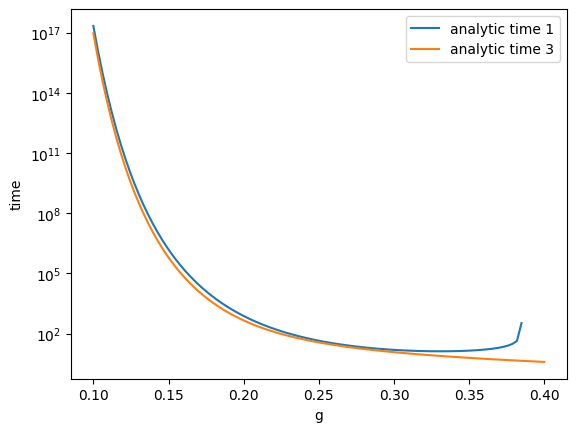

In [52]:
b = 1
l = 2
gs = np.linspace(0.1, 0.4, 100)

t1s = [analytic_time1(l, b, g) for g in gs]
t3s = [analytic_time3(l, b, g) for g in gs]

plt.plot(gs, t1s, label='analytic time 1')
plt.plot(gs, t3s, label='analytic time 3')
#plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.xlabel('g')
plt.ylabel('time')
plt.show()